Let's get started working with spatial data! In this notebook you'll learn how to open and plot GeoDataFrames in Python using the Geopandas library. We'll also demonstrate how to make an interactive map using folium.

In [2]:
# Install libaries not native to Colab
%pip install geopandas
%pip install pygeos
%pip install rtree
%pip install fiona
%pip install rioxarray
%pip install earthpy
%pip install lasio

In [3]:
# Import Python libraries
import os
os.environ['USE_PYGEOS'] = '0'

import earthpy.plot as ep
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pygeos
import rioxarray as rxr
import rtree
import fiona

In [7]:
# Download Colombia boundary
colombia_boundary_url = ("https://maps.princeton.edu/download/file/tufts-colombia-municipalities-11-shapefile.zip")

# Open Colombia boundary .shp with Geopandas
colombia_gdf = gpd.read_file(colombia_boundary_url)
colombia_gdf

,ID_ESPACIA,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,geometry
0,23189,637.49,Cabecera Municipal,CÓRDOBA,CIÉNAGA DE ORO,23,"POLYGON ((-75.71080 8.98249, -75.71119 8.98358..."
1,23570,795.00,Cabecera Municipal,CÓRDOBA,PUEBLO NUEVO,23,"POLYGON ((-75.25133 8.32489, -75.25144 8.32489..."
2,23068,1932.62,Cabecera Municipal,CÓRDOBA,AYAPEL,23,"POLYGON ((-75.18418 8.39828, -75.18352 8.39893..."
3,23580,1650.73,Cabecera Municipal,CÓRDOBA,PUERTO LIBERTADOR,23,"POLYGON ((-75.51257 7.94787, -75.51315 7.94683..."
4,23686,472.57,Cabecera Municipal,CÓRDOBA,SAN PELAYO,23,"POLYGON ((-75.71080 8.98249, -75.71024 8.98264..."
...,...,...,...,...,...,...,...
1123,23675,335.03,Cabecera Municipal,CÓRDOBA,SAN BERNARDO DEL VIENTO,23,"POLYGON ((-75.86320 9.42472, -75.86318 9.42231..."
1124,23672,210.75,Cabecera Municipal,CÓRDOBA,SAN ANTERO,23,"POLYGON ((-75.86320 9.42472, -75.86297 9.42476..."
1125,23168,320.42,Cabecera Municipal,CÓRDOBA,CHIMÁ,23,"POLYGON ((-75.71080 8.98249, -75.71213 8.98212..."
1126,23670,212.44,Cabecera Municipal,CÓRDOBA,SAN ANDRÉS DE SOTAVENTO,23,"POLYGON ((-75.57457 9.02304, -75.57458 9.02421..."


## **Department Boundaries**

In [42]:
dept2_url = "https://data.humdata.org/dataset/50ea7fee-f9af-45a7-8a52-abb9c790a0b6/resource/32fba556-0109-4d1c-84cb-c8abddf7775b/download/col-administrative-divisions-shapefiles.zip"



In [6]:
# Colombia Admin boundaries
dept_url = ("https://stacks.stanford.edu/file/druid:mj028ht5751/data.zip")

# Open data with geopandas
dept_gdf = gpd.read_file(dept_url)
dept_gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,53,COL,Colombia,1,Amazonas,1,El Encanto,CO.AM.EE,0,None,Corregimiento Departamento,Corregimiento Departamento,None,None,"POLYGON ((-73.95367 -1.10172, -73.95241 -1.098..."
1,53,COL,Colombia,1,Amazonas,2,La Chorrera,CO.AM.LC,0,None,Corregimiento Departamento,Corregimiento Departamento,None,None,"POLYGON ((-71.98020 -1.81340, -71.96750 -1.831..."
2,53,COL,Colombia,1,Amazonas,3,La Pedrera,CO.AM.LP,0,None,Corregimiento Departamento,Corregimiento Departamento,None,None,"MULTIPOLYGON (((-72.61586 -0.92313, -72.59810 ..."
3,53,COL,Colombia,1,Amazonas,4,Leticia,CO.AM.LE,0,None,Municipio,Municipality,None,None,"POLYGON ((-70.28952 -3.83257, -70.28491 -3.822..."
4,53,COL,Colombia,1,Amazonas,5,Mirití-Paraná,CO.AM.MI,0,None,Corregimiento Departamento,Corregimiento Departamento,None,Miriti Parana,"POLYGON ((-70.21880 -0.48360, -70.20900 -0.489..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,53,COL,Colombia,32,Vichada,1061,La Primavera,CO.VD.LP,0,None,Municipio,Municipality,None,None,"POLYGON ((-68.54120 5.43700, -68.55100 5.43360..."
1061,53,COL,Colombia,32,Vichada,1062,Puerto Carreño,CO.VD.PC,0,None,Municipio,Municipality,None,None,"POLYGON ((-67.49085 6.14925, -67.49323 6.13791..."
1062,53,COL,Colombia,32,Vichada,1063,San Jose de Ocune,CO.VD,0,None,Municipio,Municipality,None,None,"POLYGON ((-71.09520 2.84550, -71.09780 3.34340..."
1063,53,COL,Colombia,32,Vichada,1064,Santa Rita,None,0,None,Municipio,Municipality,None,None,"POLYGON ((-68.90510 3.65020, -68.87930 3.92910..."


In [50]:
# Explore department boundary data
dept_gdf.info()

dept_gdf["NAME_2"]

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID_0       1065 non-null   int64   
 1   ISO        1065 non-null   object  
 2   NAME_0     1065 non-null   object  
 3   ID_1       1065 non-null   int64   
 4   NAME_1     1065 non-null   object  
 5   ID_2       1065 non-null   int64   
 6   NAME_2     1065 non-null   object  
 7   HASC_2     1062 non-null   object  
 8   CCN_2      1065 non-null   int64   
 9   CCA_2      0 non-null      object  
 10  TYPE_2     1056 non-null   object  
 11  ENGTYPE_2  1056 non-null   object  
 12  NL_NAME_2  0 non-null      object  
 13  VARNAME_2  87 non-null     object  
 14  geometry   1065 non-null   geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 124.9+ KB


0              El Encanto
1             La Chorrera
2              La Pedrera
3                 Leticia
4           Mirití-Paraná
              ...        
1060         La Primavera
1061       Puerto Carreño
1062    San Jose de Ocune
1063           Santa Rita
1064        Santa Rosalía
Name: NAME_2, Length: 1065, dtype: object

In [45]:
# Select Amazonas municipality
amazonas = colombia_gdf[colombia_gdf["NOM_DEPART"] == "AMAZONAS"]
amazonas

,ID_ESPACIA,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,geometry
33,91530,8410.09,Corregimiento Departamental,AMAZONAS,PUERTO ALEGRÍA (Cor. Departamental),91,"POLYGON ((-74.38851 -0.55351, -74.38102 -0.551..."
34,91263,10690.26,Corregimiento Departamental,AMAZONAS,EL ENCANTO (Cor. Departamental),91,"POLYGON ((-71.77392 -2.17489, -71.77594 -2.176..."
35,91536,13641.05,Corregimiento Departamental,AMAZONAS,PUERTO ARICA (Cor. Departamental),91,"POLYGON ((-71.77392 -2.17489, -71.77593 -2.171..."
36,91798,9137.71,Corregimiento Departamental,AMAZONAS,TARAPACÁ (Cor. Departamental),91,"POLYGON ((-69.71428 -3.00261, -69.71601 -3.002..."
37,91001,6186.26,CAP. DEPTO,AMAZONAS,LETICIA,91,"POLYGON ((-69.71428 -3.00261, -69.88301 -3.940..."
38,91540,1515.58,Cabecera Municipal,AMAZONAS,PUERTO NARIÑO,91,"POLYGON ((-70.33734 -3.20082, -70.33744 -3.211..."
39,91460,16891.79,Corregimiento Departamental,AMAZONAS,MIRITÍ-PARANÁ (Campoamor) (Cor. Departamental),91,"POLYGON ((-71.99610 -0.26831, -71.98758 -0.268..."
40,91430,1506.18,Corregimiento Departamental,AMAZONAS,LA VICTORIA (Pacoa) (Cor. Departamental),91,"POLYGON ((-71.44949 0.02042, -71.44805 0.02046..."
41,91405,12738.75,Corregimiento Departamental,AMAZONAS,LA CHORRERA (Cor. Departamental),91,"POLYGON ((-71.99031 -1.53227, -71.99052 -1.553..."
42,91669,14759.22,Corregimiento Departamental,AMAZONAS,SANTANDER (Araracuara) (Cor. Departamental),91,"POLYGON ((-70.72647 -1.43024, -70.73084 -1.434..."


In [46]:
# Select Puerto Nariño
pn = amazonas[amazonas["NOM_MUNICI"] == "PUERTO NARIÑO"]
pn

,ID_ESPACIA,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,geometry
38,91540,1515.58,Cabecera Municipal,AMAZONAS,PUERTO NARIÑO,91,"POLYGON ((-70.33734 -3.20082, -70.33744 -3.211..."


<Axes: >

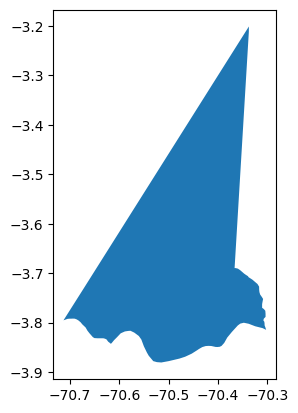

In [47]:
pn.plot()

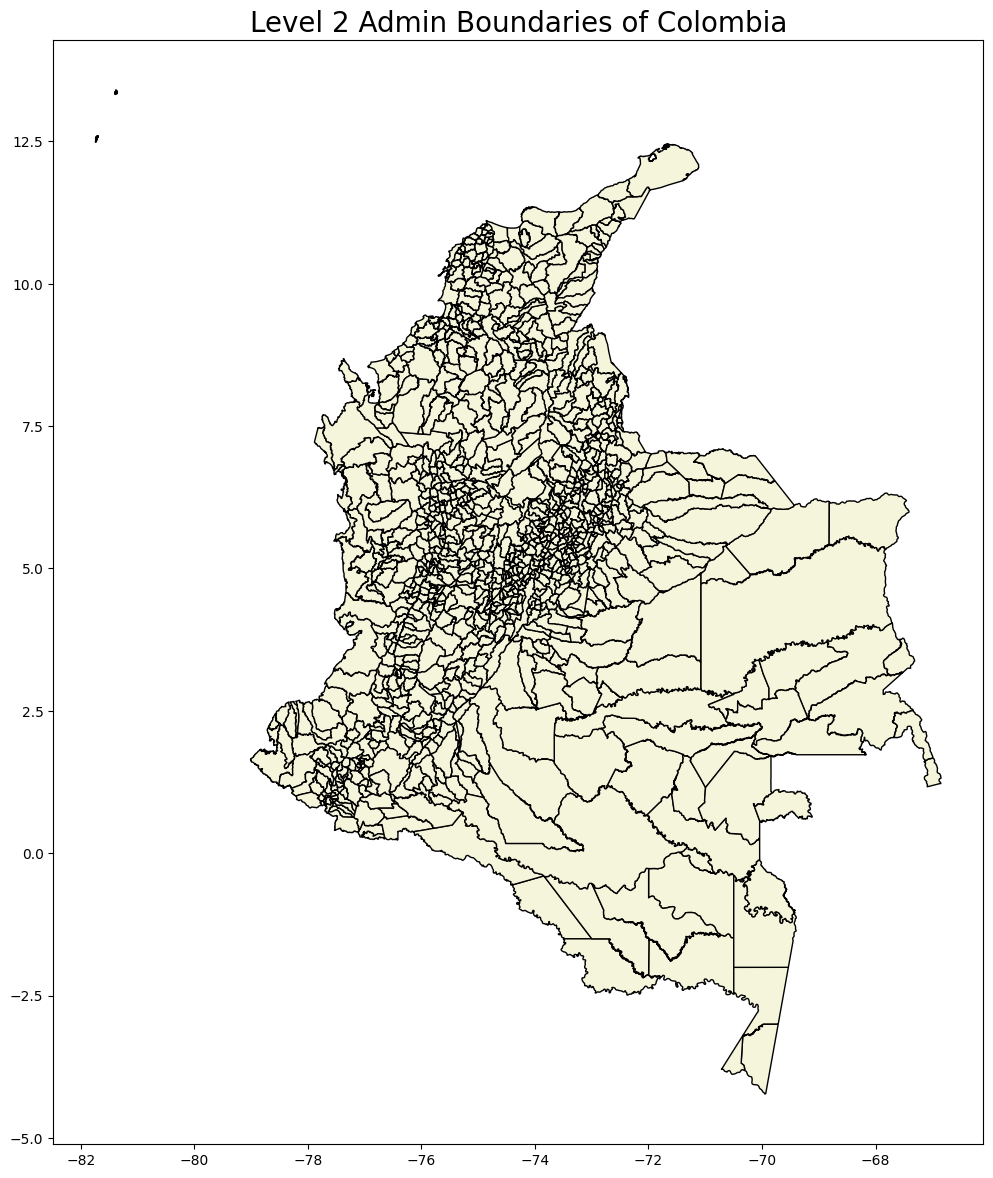

In [52]:
# Plot the geodataframe using Matplotlib
fig, ax = plt.subplots(figsize=(12,20))
colombia_gdf.plot(ax=ax,
         edgecolor='black',
         color='beige')
#dept_gdf.plot(ax=ax,
               #edgecolor='red',
               #color='None')
plt.title('Level 2 Admin Boundaries of Colombia', fontsize=20)
plt.show()

## **Petroleum & Gas (2013)**

In [55]:
# Oil & Gas

# Citation: Petroleum and Gas Extraction Sites Colombia 2013. [Shapefile].
# Sistema de Inforrmacion Ambiental de Colombia (SIAC).
# Retrieved from https://earthworks.stanford.edu/catalog/tufts-colombia-petroleumgasexplotation-sites-13

oil_url = ("https://maps.princeton.edu/download/file/tufts-colombia-petroleumgasexplotation-sites-13-shapefile.zip")

oil_gdf = gpd.read_file(oil_url)
oil_gdf

,CORPORACIO,DEPTO,ESTADO,EXP,FECHA,MUNIC,PROYECTO,REGION,RESOLUCION,SOLICITANT,geometry
0,CORPOAMAZONIA,CAQUETA,SEGUIMIENTO,LAM4353,04/06/2009,SAN JOSE DEL FRAGUA,AREA DE PERFORACION EXPLORATORIA TOPOYACO-TOPO...,AMAZONIA,1035.0,TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA,POINT (-76.22626 1.14385)
1,CORPOAMAZONIA,CAQUETA,SEGUIMIENTO,LAM4353,04/06/2009,SAN JOSE DEL FRAGUA,AREA DE PERFORACION EXPLORATORIA TOPOYACO-TOPO...,AMAZONIA,1035.0,TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA,POINT (-76.23612 1.13818)
2,CORPOAMAZONIA,CAQUETA,SEGUIMIENTO,LAM4353,04/06/2009,SAN JOSE DEL FRAGUA,AREA DE PERFORACION EXPLORATORIA TOPOYACO-TOPO...,AMAZONIA,1035.0,TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA,POINT (-76.22893 1.14162)
3,CORPOCESAR,CESAR,SEGUIMIENTO,LAM4539,21/12/2009,EL PASO,LICENCIA AMBIENTAL GLOBAL PARA EL PROYECTO CAM...,NORTE,2563.0,TEXICAN OIL LTD SUCURSAL COLOMBIA,POINT (-73.68522 9.70236)
4,CORPOCESAR,CESAR,SEGUIMIENTO,LAM4539,21/12/2009,EL PASO,LICENCIA AMBIENTAL GLOBAL PARA EL PROYECTO CAM...,NORTE,2563.0,TEXICAN OIL LTD SUCURSAL COLOMBIA,POINT (-73.67319 9.71454)
...,...,...,...,...,...,...,...,...,...,...,...
941,CAM,HUILA,SEGUIMIENTO,LAM3703,07/06/2007,PALERMO,POZO EXPLORATORIO GUANABANA-2,CENTRO SUR,1007.0,HOCOL S.A.,POINT (-75.38347 2.77870)
942,CAM,HUILA,SEGUIMIENTO,LAM3703,07/06/2007,PALERMO,POZO EXPLORATORIO GUANABANA-1,CENTRO SUR,1007.0,HOCOL S.A.,POINT (-75.38787 2.76720)
943,CORPOBOYACA,BOYACA,SEGUIMIENTO,LAM1994,17/12/2003,PUERTO BOYACA,POZO BALSO-1,CENTRO,1378.0,MANSAROVAR ENERGY COLOMBIA LTD,POINT (-74.53784 6.17697)
944,CORPOBOYACA,BOYACA,SEGUIMIENTO,LAM1994,17/12/2003,PUERTO BOYACA,POZO MORICHE-1,CENTRO,1378.0,MANSAROVAR ENERGY COLOMBIA LTD,POINT (-74.53605 6.19696)


In [56]:
print(oil_gdf['SOLICITANT'].to_string(index=False))

         TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA
         TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA
         TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA
                 TEXICAN OIL LTD SUCURSAL COLOMBIA
                 TEXICAN OIL LTD SUCURSAL COLOMBIA
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                                      DRUMMOND LTD
                               

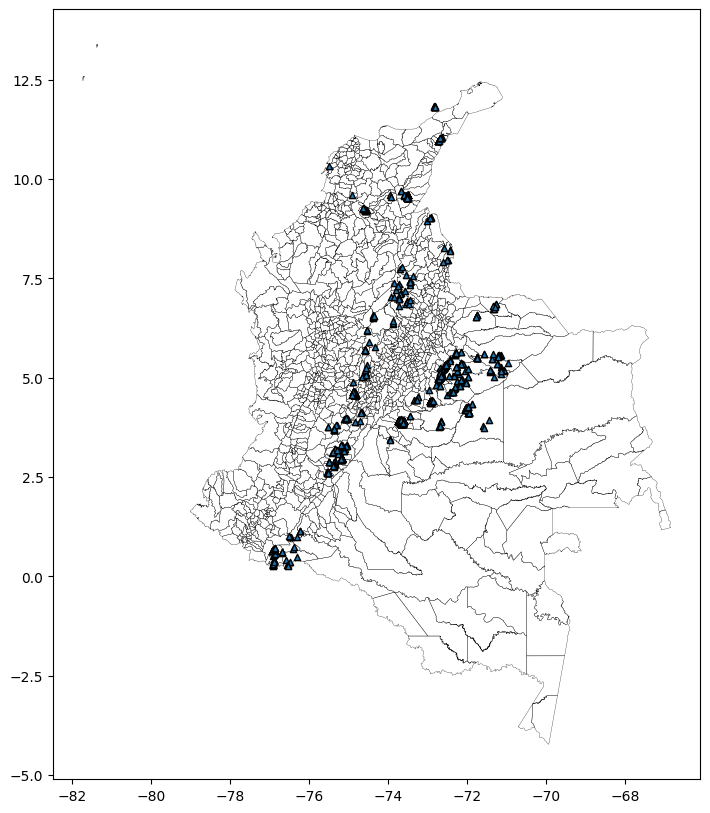

In [59]:
# Plot Political Boundaries
fig, ax = plt.subplots(figsize=(20,10))
colombia_gdf.plot(ax=ax,
              edgecolor='black',
              color='none',
              linewidth=0.2)
#polbnd_gpd.plot(ax=ax,
                #markersize=0.5)
oil_gdf.plot(ax=ax,
             marker='^',
             edgecolor='black',
             markersize=20)
plt.show()

## **Rivers**

In [60]:
# Open Colombia rivers
rivers_url = ("https://maps.princeton.edu/download/file/tufts-colombia-major-rivers-11-shapefile.zip")

rivers_gdf = gpd.read_file(rivers_url)
rivers_gdf

,gml_id,nombre_geo,symbol,geometry
0,Drenaje_DobleQ.1,RÍO BANADIA,3,"POLYGON ((-71.77688 6.98672, -71.77690 6.98673..."
1,Drenaje_DobleQ.2,RÍO SAN BARTOLO,3,"POLYGON ((-74.39558 6.68462, -74.39369 6.68327..."
2,Drenaje_DobleQ.3,BRAZUELO DE LA ROMPIDA,3,"POLYGON ((-73.98540 7.23822, -73.98589 7.23747..."
3,Drenaje_DobleQ.4,None,3,"POLYGON ((-71.58675 6.46682, -71.58673 6.46678..."
4,Drenaje_DobleQ.5,Estero,None,"POLYGON ((-70.76271 5.50627, -70.76281 5.50574..."
...,...,...,...,...
272,Drenaje_DobleQ.263,RÍO TOLA,3,"POLYGON ((-78.28576 2.60301, -78.28437 2.58979..."
273,Drenaje_DobleQ.264,ESTERO SECADERO,3,"POLYGON ((-78.28165 2.43932, -78.28157 2.44015..."
274,Drenaje_DobleQ.265,None,3,"POLYGON ((-77.64400 2.93037, -77.64378 2.92925..."
275,Drenaje_DobleQ.266,RÍO PATÍA,3,"POLYGON ((-78.41314 2.18721, -78.41418 2.18572..."


In [61]:
rivers_gdf.info()
rivers_gdf.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gml_id      277 non-null    object  
 1   nombre_geo  259 non-null    object  
 2   symbol      276 non-null    object  
 3   geometry    277 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 8.8+ KB


<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

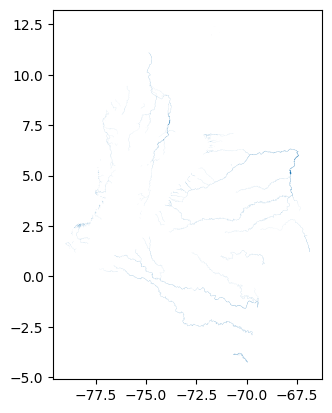

In [62]:
rivers_gdf.plot()

## **Roads**

In [63]:
# Open Columbia roads (850,000 entries!)
roads_url = ("https://maps.princeton.edu/download/file/tufts-colombia-roads-11-shapefile.zip")

roads_gdf = gpd.read_file(roads_url)
roads_gdf.head()

,tipo_via,estado_sup,numero_car,accesibili,nombre_geo,clas_tipov,esc_vis,type,geometry
0,6.0,Sin Valor,Sin Valor,Sin Valor,None,6,0.0,3,"LINESTRING (-70.48271 4.24664, -70.48295 4.245..."
1,6.0,Sin Valor,Sin Valor,Sin Valor,None,6,0.0,3,"LINESTRING (-70.50524 4.26742, -70.50498 4.267..."
2,6.0,Sin Valor,Sin Valor,Sin Valor,None,6,0.0,3,"LINESTRING (-70.19799 4.24444, -70.19862 4.243..."
3,5.0,3306,3502,3601,None,5,0.0,3,"LINESTRING (-67.45190 3.51188, -67.45173 3.513..."
4,1.0,3301,3501,3600,None,1,17000000.0,1,"LINESTRING (-76.01828 1.87813, -76.00653 1.880..."


In [64]:
# Explore data
roads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11400 entries, 0 to 11399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tipo_via    11400 non-null  float64 
 1   estado_sup  11400 non-null  object  
 2   numero_car  11400 non-null  object  
 3   accesibili  11400 non-null  object  
 4   nombre_geo  11 non-null     object  
 5   clas_tipov  11202 non-null  object  
 6   esc_vis     11400 non-null  float64 
 7   type        11400 non-null  int64   
 8   geometry    11400 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(5)
memory usage: 801.7+ KB


## **Airports**

In [65]:
# Download Airports data
col_airports_url = "https://maps.princeton.edu/download/file/tufts-colombia-mainairports-14-shapefile.zip"
col_airports_gdf = gpd.read_file(col_airports_url)
col_airports_gdf.head()

,gml_id,id_aero,nombre,tipo,administra,estadocon,n_desti_in,cod_iata,cod_oaci,ciudad_loc,municipio,departamen,observacio,latitud,longitud,lat_decima,long_decim,mi_style,geometry
0,Aeropuertos.1,1.0,AEROPUERTO INTERNACIONAL EL EDÉN,INTERNACIONAL,ANI,EN ESTRUCTURACION,1.0,AXM,SKAR,ARMENIA,LA TEBAIDA,QUINDÍO,INTERNACIONAL,04°27'09.99 N,75°45'59.21 O,4.452775,-75.766447,"Symbol (35, 0, 12)",POINT (-75.76645 4.45278)
1,Aeropuertos.2,2.0,AEROPUERTO INTERNACIONAL ERNESTO CORTISSOZ,INTERNACIONAL,ANI,EN ESTRUCTURACION,3.0,BAQ,SKBQ,BARRANQUILLA,SOLEDAD,ATLÁNTICO,INTERNACIONAL,10°53'22.52 N,74°46'50.95 O,10.889589,-74.780819,"Symbol (35, 0, 12)",POINT (-74.78082 10.88959)
2,Aeropuertos.3,3.0,AEROPUERTO INTERNACIONAL EL DORADO,INTERNACIONAL,ANI,CONCESIONADO,51.0,BOG,SKBO,BOGOTÁ D.C.,BOGOTÁ D.C.,BOGOTÁ D.C.,INTERNACIONAL,04°42'05.74 N,74°08'49.01 O,4.701594,-74.146947,"Symbol (35, 0, 12)",POINT (-74.14695 4.70159)
3,Aeropuertos.4,4.0,AEROPUERTO INTERNACIONAL PALONEGRO,INTERNACIONAL,ANI,CONCESIONADO,1.0,BGA,SKBG,BUCARAMANGA,LEBRIJA,SANTANDER,INTERNACIONAL,07°07'35.40 N,73°11'05.20 O,7.126500,-73.184778,"Symbol (35, 0, 12)",POINT (-73.18478 7.12650)
4,Aeropuertos.5,5.0,AEROPUERTO INTERNACIONAL ALFONSO BONILLA ARAGÓN,INTERNACIONAL,ANI,CONCESIONADO,8.0,CLO,SKCL,CALI,PALMIRA,VALLE DEL CAUCA,INTERNACIONAL,03°32'35.60 N,76°22'53.70 O,3.543222,-76.381583,"Symbol (35, 0, 12)",POINT (-76.38158 3.54322)


In [66]:
pd.crosstab(col_airports_gdf.tipo, col_airports_gdf.administra)

administra,AEROCIVIL,ANI
tipo,,
INTERNACIONAL,2,11
MILITAR,7,0
NACIONAL,7,10
NACIONAL - REGIONAL,33,1
REGIONAL,1,0
REGIONAL - NO PASAJEROS,16,1


<Axes: >

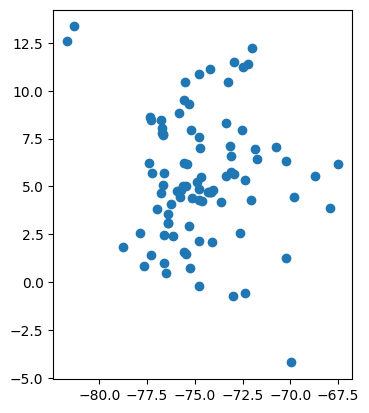

In [67]:
col_airports_gdf.plot()

In [69]:
# Looking at airport data as csv (pandas df)
col_airports_df = pd.read_csv("https://ourairports.com/countries/CO/airports.csv")
col_airports_df

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6104,SKBO,large_airport,El Dorado International Airport,4.701590,-74.146900,8361.0,NaN,Colombia,CO,...,Bogota,1,SKBO,BOG,BOG,https://eldorado.aero/,https://en.wikipedia.org/wiki/El_Dorado_Intern...,Cundinamarca,51275,2023-12-15T12:55:30+00:00
1,6109,SKCG,medium_airport,Rafael Nuñez International Airport,10.442400,-75.513000,4.0,SA,Colombia,CO,...,Cartagena,1,SKCG,CTG,CTG,NaN,https://en.wikipedia.org/wiki/Rafael_N%C3%BA%C...,NaN,750,2009-10-20T10:46:09+00:00
2,6158,SKRG,medium_airport,Jose Maria Córdova International Airport,6.164540,-75.423100,6955.0,SA,Colombia,CO,...,Medellín,1,SKRG,MDE,MDE,NaN,https://en.wikipedia.org/wiki/Jos%C3%A9_Mar%C3...,NaN,750,2017-08-14T21:49:57+00:00
3,6110,SKCL,medium_airport,Alfonso Bonilla Aragon International Airport,3.543220,-76.381600,3162.0,SA,Colombia,CO,...,Cali,1,SKCL,CLO,CLO,https://www.aerocali.com.co/,https://en.wikipedia.org/wiki/Alfonso_Bonilla_...,"Palmaseca International, 02-20",750,2019-08-15T00:05:28+00:00
4,6105,SKBQ,medium_airport,Ernesto Cortissoz International Airport,10.889600,-74.780800,98.0,SA,Colombia,CO,...,Barranquilla,1,SKBQ,BAQ,BAQ,NaN,https://en.wikipedia.org/wiki/Ernesto_Cortisso...,NaN,750,2009-10-20T10:46:07+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,45104,CO-0003,heliport,Banco De La Republica Heliport,1.196944,-77.280000,NaN,SA,Colombia,CO,...,Pasto,0,NaN,NaN,BNC,NaN,NaN,NaN,0,2012-06-09T11:20:37+00:00
727,45105,CO-0004,heliport,Banco De La Republica Heliport,5.697500,-76.665000,NaN,SA,Colombia,CO,...,Quibdo,0,NaN,NaN,BND,NaN,NaN,NaN,0,2012-06-09T11:07:51+00:00
728,45115,CO-0014,heliport,Cofa Roldanillo Heliport,4.413611,-76.143333,NaN,SA,Colombia,CO,...,Roldanillo,0,NaN,NaN,ICR,NaN,NaN,NaN,0,2012-06-09T12:06:00+00:00
729,45101,SKSF,closed,Santa Fé de Antioquía Airport,6.500631,-75.822521,1500.0,SA,Colombia,CO,...,Santa Fé de Antioquía,0,NaN,NaN,NaN,NaN,NaN,"SKSF, SKSF, SFA",0,2016-03-11T19:36:26+00:00


In [70]:
# Looking at airport data as csv (pandas df)
col_airports_df = pd.read_csv("https://ourairports.com/countries/CO/airports.csv")


# Create geodataframe from pandas df
coordinates = gpd.points_from_xy(
    col_airports_df.longitude_deg,
    col_airports_df.latitude_deg)

col_airports_gdf2 = gpd.GeoDataFrame(
    data=col_airports_df,
    geometry=coordinates)

# Convert to shp
col_airports_gdf2.to_file("col_airports.shp")

col_airports_gdf2.crs

<ipython-input-70-4fbf56c46e85>:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  col_airports_gdf2.to_file("col_airports.shp")


In [71]:
col_airports_gdf2

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated,geometry
0,6104,SKBO,large_airport,El Dorado International Airport,4.701590,-74.146900,8361.0,NaN,Colombia,CO,...,1,SKBO,BOG,BOG,https://eldorado.aero/,https://en.wikipedia.org/wiki/El_Dorado_Intern...,Cundinamarca,51275,2023-12-15T12:55:30+00:00,POINT (-74.14690 4.70159)
1,6109,SKCG,medium_airport,Rafael Nuñez International Airport,10.442400,-75.513000,4.0,SA,Colombia,CO,...,1,SKCG,CTG,CTG,NaN,https://en.wikipedia.org/wiki/Rafael_N%C3%BA%C...,NaN,750,2009-10-20T10:46:09+00:00,POINT (-75.51300 10.44240)
2,6158,SKRG,medium_airport,Jose Maria Córdova International Airport,6.164540,-75.423100,6955.0,SA,Colombia,CO,...,1,SKRG,MDE,MDE,NaN,https://en.wikipedia.org/wiki/Jos%C3%A9_Mar%C3...,NaN,750,2017-08-14T21:49:57+00:00,POINT (-75.42310 6.16454)
3,6110,SKCL,medium_airport,Alfonso Bonilla Aragon International Airport,3.543220,-76.381600,3162.0,SA,Colombia,CO,...,1,SKCL,CLO,CLO,https://www.aerocali.com.co/,https://en.wikipedia.org/wiki/Alfonso_Bonilla_...,"Palmaseca International, 02-20",750,2019-08-15T00:05:28+00:00,POINT (-76.38160 3.54322)
4,6105,SKBQ,medium_airport,Ernesto Cortissoz International Airport,10.889600,-74.780800,98.0,SA,Colombia,CO,...,1,SKBQ,BAQ,BAQ,NaN,https://en.wikipedia.org/wiki/Ernesto_Cortisso...,NaN,750,2009-10-20T10:46:07+00:00,POINT (-74.78080 10.88960)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,45104,CO-0003,heliport,Banco De La Republica Heliport,1.196944,-77.280000,NaN,SA,Colombia,CO,...,0,NaN,NaN,BNC,NaN,NaN,NaN,0,2012-06-09T11:20:37+00:00,POINT (-77.28000 1.19694)
727,45105,CO-0004,heliport,Banco De La Republica Heliport,5.697500,-76.665000,NaN,SA,Colombia,CO,...,0,NaN,NaN,BND,NaN,NaN,NaN,0,2012-06-09T11:07:51+00:00,POINT (-76.66500 5.69750)
728,45115,CO-0014,heliport,Cofa Roldanillo Heliport,4.413611,-76.143333,NaN,SA,Colombia,CO,...,0,NaN,NaN,ICR,NaN,NaN,NaN,0,2012-06-09T12:06:00+00:00,POINT (-76.14333 4.41361)
729,45101,SKSF,closed,Santa Fé de Antioquía Airport,6.500631,-75.822521,1500.0,SA,Colombia,CO,...,0,NaN,NaN,NaN,NaN,NaN,"SKSF, SKSF, SFA",0,2016-03-11T19:36:26+00:00,POINT (-75.82252 6.50063)


In [39]:
# Select only international, military and national airports

airport_types = ["INTERNACIONAL", "MILITAR", "NACIONAL"]

inter_mil_nat = col_airports_gdf[
    col_airports_gdf["tipo"].isin(airport_types)]
inter_mil_nat.head()

,gml_id,id_aero,nombre,tipo,administra,estadocon,n_desti_in,cod_iata,cod_oaci,ciudad_loc,municipio,departamen,observacio,latitud,longitud,lat_decima,long_decim,mi_style,geometry
0,Aeropuertos.1,1.0,AEROPUERTO INTERNACIONAL EL EDÉN,INTERNACIONAL,ANI,EN ESTRUCTURACION,1.0,AXM,SKAR,ARMENIA,LA TEBAIDA,QUINDÍO,INTERNACIONAL,04°27'09.99 N,75°45'59.21 O,4.452775,-75.766447,"Symbol (35, 0, 12)",POINT (-75.76645 4.45278)
1,Aeropuertos.2,2.0,AEROPUERTO INTERNACIONAL ERNESTO CORTISSOZ,INTERNACIONAL,ANI,EN ESTRUCTURACION,3.0,BAQ,SKBQ,BARRANQUILLA,SOLEDAD,ATLÁNTICO,INTERNACIONAL,10°53'22.52 N,74°46'50.95 O,10.889589,-74.780819,"Symbol (35, 0, 12)",POINT (-74.78082 10.88959)
2,Aeropuertos.3,3.0,AEROPUERTO INTERNACIONAL EL DORADO,INTERNACIONAL,ANI,CONCESIONADO,51.0,BOG,SKBO,BOGOTÁ D.C.,BOGOTÁ D.C.,BOGOTÁ D.C.,INTERNACIONAL,04°42'05.74 N,74°08'49.01 O,4.701594,-74.146947,"Symbol (35, 0, 12)",POINT (-74.14695 4.70159)
3,Aeropuertos.4,4.0,AEROPUERTO INTERNACIONAL PALONEGRO,INTERNACIONAL,ANI,CONCESIONADO,1.0,BGA,SKBG,BUCARAMANGA,LEBRIJA,SANTANDER,INTERNACIONAL,07°07'35.40 N,73°11'05.20 O,7.126500,-73.184778,"Symbol (35, 0, 12)",POINT (-73.18478 7.12650)
4,Aeropuertos.5,5.0,AEROPUERTO INTERNACIONAL ALFONSO BONILLA ARAGÓN,INTERNACIONAL,ANI,CONCESIONADO,8.0,CLO,SKCL,CALI,PALMIRA,VALLE DEL CAUCA,INTERNACIONAL,03°32'35.60 N,76°22'53.70 O,3.543222,-76.381583,"Symbol (35, 0, 12)",POINT (-76.38158 3.54322)


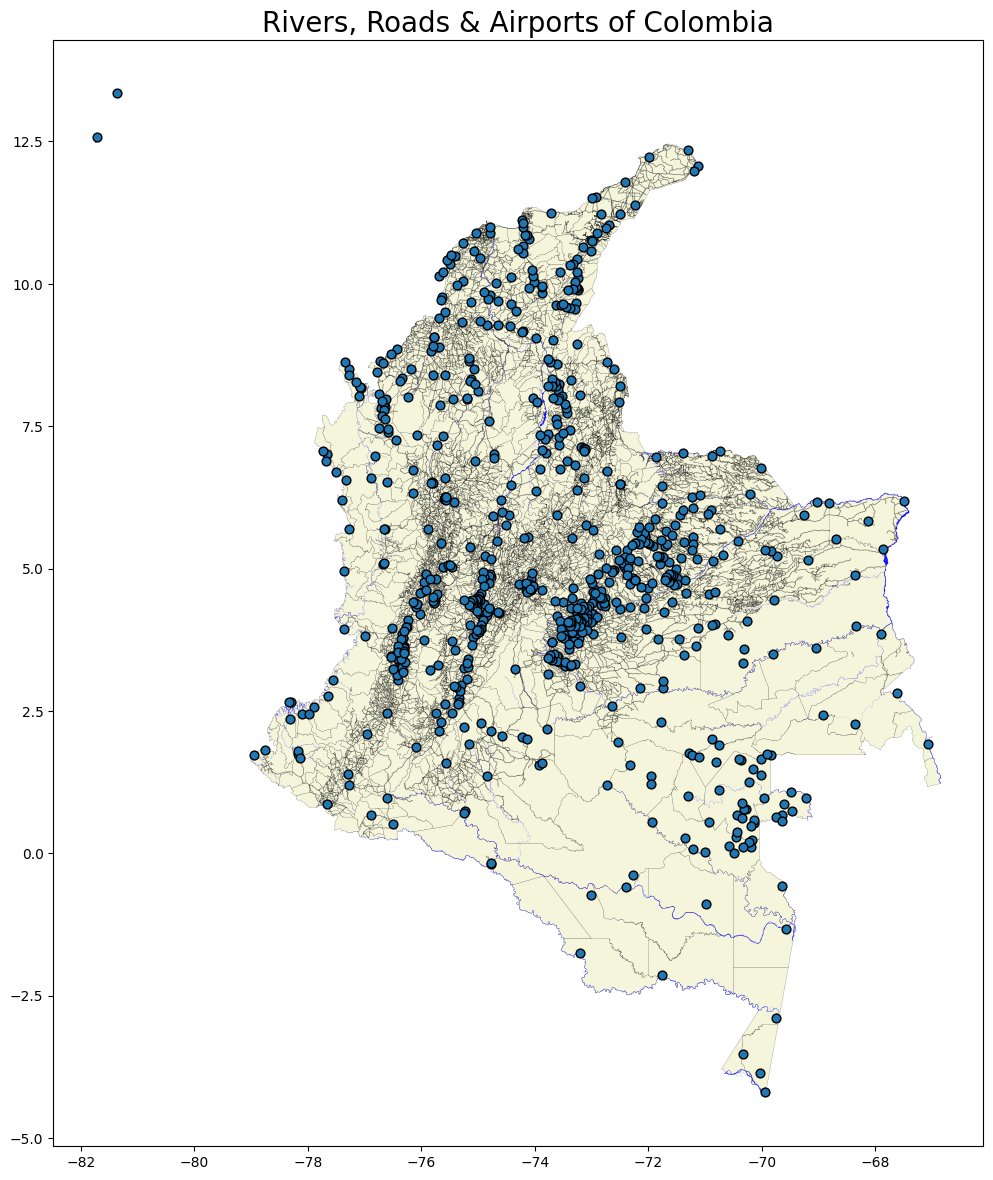

In [73]:
fig, ax = plt.subplots(figsize=(12,20))


colombia_gdf.plot(
    ax=ax,
    color='beige',
    edgecolor='black',
    linewidth=0.1)

rivers_gdf.plot(
    ax=ax,
    linewidth=1,
    color='blue',
    alpha=0.9)

col_airports_gdf2.plot(
    ax=ax,
    markersize=40,
    edgecolor='black',
    #column='type',
    #legend=True,
    zorder=4)

roads_gdf.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

plt.title('Rivers, Roads & Airports of Colombia', fontsize=20)
plt.show()

In [75]:
# Conservation Areas?
conservation_url = "https://maps.princeton.edu/download/file/tufts-colombia-prioritizedenvconsareas-12-shapefile.zip"

conservation_gdf = gpd.read_file(conservation_url)
conservation_gdf

,OBJECTID,FID_ECOSIN,COUNT_,FIRST_ECOS,UNIDAD_ANA,PRIORIDAD,SHAPE_Leng,explica_pr,geometry
0,1,33,3.0,Aguas cont. naturales del helobioma Amazonia y...,Guyana Yari_Miriti Helobiomas de la Amazonia y...,h,1535.638403,baja insuficiencia y sin urgencia,"MULTIPOLYGON (((-69.72375 -1.29256, -69.72305 ..."
1,2,34,1.0,Aguas cont. naturales del helobioma Amazonia y...,Amazonia Caguan_Florencia Helobiomas de la Ama...,g,65.931033,baja insuficiencia y urgente,"MULTIPOLYGON (((-74.57031 -0.11575, -74.57036 ..."
2,3,35,1.0,Lagunas costeras del helobioma Pacífico y Atrato,NorAndina Valle_seco_Patia Helobiomas del Pací...,d,21.960951,omisiones sin urgencia,"POLYGON ((-77.78335 1.88468, -77.78381 1.88448..."
3,4,38,2.0,Aguas cont. naturales del helobioma Amazonia y...,Guyana Vaupes Helobiomas de la Amazonia y Orin...,h,3.960279,baja insuficiencia y sin urgencia,"POLYGON ((-72.77739 2.57914, -72.77742 2.57949..."
4,5,38,2.0,Aguas cont. naturales del helobioma Amazonia y...,Guyana Vaupes Helobiomas de la Amazonia y Orin...,h,53.027423,baja insuficiencia y sin urgencia,"POLYGON ((-72.76568 2.58083, -72.76507 2.58073..."
...,...,...,...,...,...,...,...,...,...
16432,16433,69486,5.0,Aguas cont. naturales del helobioma Pacífico y...,Choco_Magdalena Atrato Helobiomas del Pacífico...,g,13.326469,baja insuficiencia y urgente,"POLYGON ((-77.02930 7.71022, -77.02930 7.71028..."
16433,16434,69486,5.0,Aguas cont. naturales del helobioma Pacífico y...,Choco_Magdalena Atrato Helobiomas del Pacífico...,g,1.257992,baja insuficiencia y urgente,"POLYGON ((-77.11124 7.44756, -77.10682 7.44793..."
16434,16435,69486,5.0,Aguas cont. naturales del helobioma Pacífico y...,Choco_Magdalena Atrato Helobiomas del Pacífico...,g,4.448094,baja insuficiencia y urgente,"MULTIPOLYGON (((-77.08465 7.47795, -77.08562 7..."
16435,16436,69486,5.0,Aguas cont. naturales del helobioma Pacífico y...,Choco_Magdalena Atrato Helobiomas del Pacífico...,g,1.220483,baja insuficiencia y urgente,"MULTIPOLYGON (((-77.07257 7.51067, -77.07105 7..."


In [76]:
# Forest areas
forest_url = "https://maps.princeton.edu/download/file/tufts-colombia-forest-reserves-12-shapefile.zip"
forest_gdf = gpd.read_file(forest_url)
forest_gdf

,nombre_zrf,area_ha,nombre_z_1,area_ha_1,geometry
0,Pacífico,8.069757e+06,Pacífico,8.047495e+06,"MULTIPOLYGON (((-76.31857 8.26714, -76.31750 8..."
1,Sierra Nevada de Santa Marta,5.262357e+05,Sierra Nevada de Santa Marta,5.280525e+05,"MULTIPOLYGON (((-73.24657 10.51653, -73.24657 ..."
2,RFN_L2°_59 Serranía de Los Motilones,5.219028e+05,Serranía de Los Motilones,5.241259e+05,"MULTIPOLYGON (((-73.08240 9.56633, -73.08216 9..."
3,Cocuy,7.158414e+05,Cocuy,7.204282e+05,"POLYGON ((-72.47034 7.48265, -72.46925 7.48238..."
4,Central,1.496513e+06,Central,1.495426e+06,"MULTIPOLYGON (((-75.13256 5.81325, -75.13190 5..."
5,Río Magdalena,2.125560e+06,Río Magdalena,2.130886e+06,"MULTIPOLYGON (((-74.77991 7.16391, -74.77991 7..."
6,Amazonia,3.492608e+07,Amazonia,3.519454e+07,"MULTIPOLYGON (((-67.64612 3.82720, -67.64566 3..."


<Axes: >

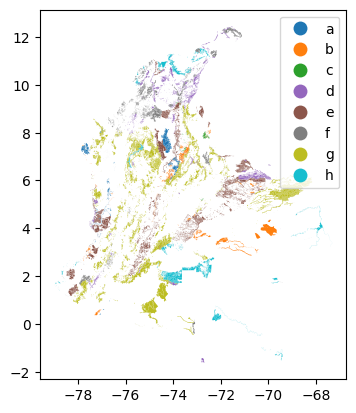

In [77]:
conservation_gdf.plot(column="PRIORIDAD",
                      legend=True)

<Axes: >

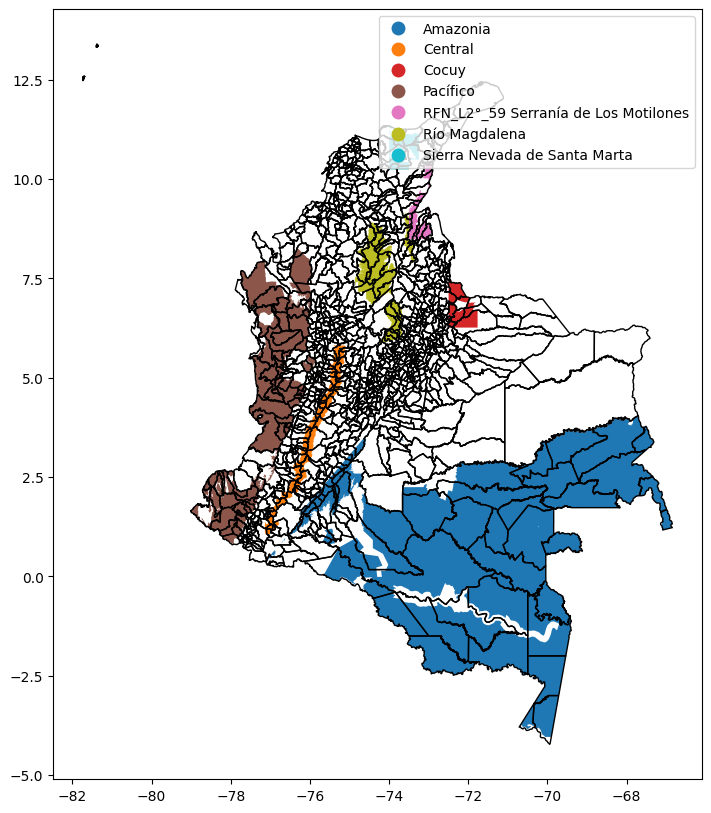

In [78]:
fig, ax = plt.subplots(figsize=(12,10))
forest_gdf.plot(column="nombre_zrf", legend=True,ax=ax)
colombia_gdf.plot(ax=ax, color='None')

<Axes: >

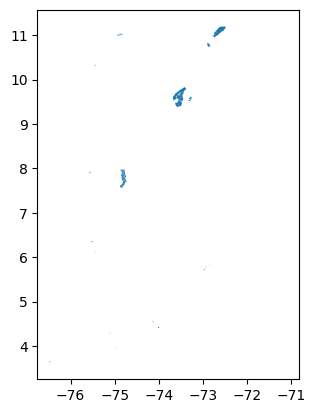

In [79]:
# Mining Areas
mining_url = "https://maps.princeton.edu/download/file/tufts-colombia-miningprojects-13-shapefile.zip"
mining_gdf = gpd.read_file(mining_url)
mining_gdf.plot()

<Axes: >

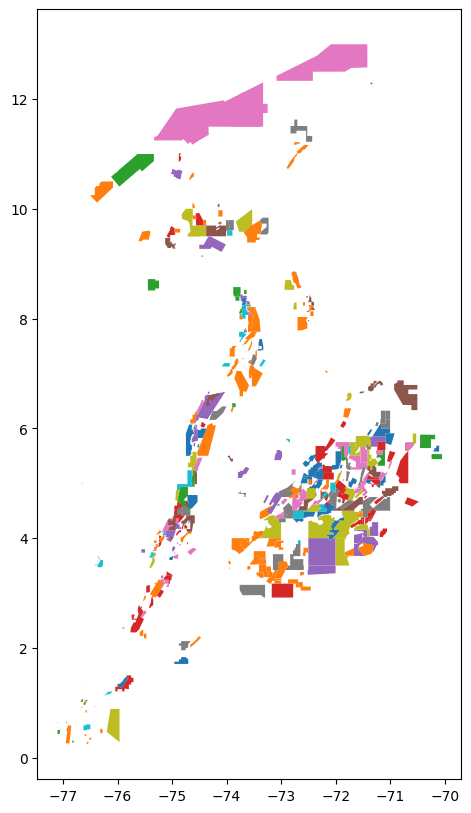

In [80]:
# Petroleum / Gas exploration 2014 - polygon
gas_2014_url = "https://maps.princeton.edu/download/file/tufts-colombia-petroleumgasexplorationareas-14-shapefile.zip"
gas_2014_gdf = gpd.read_file(gas_2014_url)
gas_2014_gdf.plot(column="SOLICITANT", figsize=(12,10))

In [81]:
gas_2014_gdf

,CORPORACIO,DEPTO,ESTADO,EXP,FECHA,MUNIC,PROYECTO,REGION,RESOLUCION,SOLICITANT,OBSERVACIO,SUB,Shape_Leng,geometry
0,None,COSTA AFUERA,SEGUIMIENTO,LAM4701,01/07/2011,None,PERFORACION EXPLORATORIA COSTA AFUERA DE LOS B...,MAR CARIBE,1315.0,EQUION ENERGIA LIMITED,None,1,237.084152,"POLYGON ((-75.33289 10.87122, -75.55129 10.683..."
1,CDMB,SANTANDER,ARCHIVADO,LAM1059,28/09/1998,GIRON Y LEBRIJA,AREA DE INTERES DE PERFORACION EXPLORATORIA GU...,NORTE,921.0,TRITON RESOURCES,None,1,40.026316,"POLYGON ((-73.32203 7.26157, -73.28386 7.23726..."
2,CORPORINOQUIA,CASANARE,ARCHIVADO,LAM0651,30/08/1996,AGUAZUL,BLOQUE DE EXPLORACION LA CABAÑA,ORINOQUIA,945.0,ECOPETROL S.A,None,1,50.026122,"POLYGON ((-72.50175 4.97512, -72.50135 5.14029..."
3,CORPORINOQUIA,CASANARE Y BOYACA,ARCHIVADO,LAM1231,30/07/1998,"YOPAL, AGUAZUL, PAJARITO Y LABRANZAGRANDE",AREA DE PERFORACION EXPLORATORIA DELE,ORINOQUIA,702.0,BP EXPLORATION COMPANY (COLOMBIA) LTD.,None,1,41.012352,"POLYGON ((-72.60429 5.36117, -72.55126 5.41871..."
4,CORPORINOQUIA,CASANARE,ARCHIVADO,LAM1284,28/07/1998,AGUAZUL,AREA DE POZOS DE DESARROLLO MULTIPLES DENOMINA...,ORINOQUIA,685.0,BP EXPLORATION COMPANY (COLOMBIA) LTD.,None,1,4.000000,"POLYGON ((-72.69454 5.04123, -72.69003 5.04122..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,CAM,HUILA,SEGUIMIENTO,LAM2245,20/10/2000,None,AREA DE INTERES MATAMBO,SUR,1061.0,HOCOL S.A.,AREA DE INTERES BLOQUE SAN JACINTO,3,35.389217,"POLYGON ((-75.57643 2.41697, -75.57615 2.41683..."
665,CORPOCESAR,CESAR,SEGUIMIENTO,LAM5771,06/03/2013,AGUACHICA,AREA DE PÉRFORACION EXPLORATORIA SANTA ISABEL,CARIBE,220.0,GREEN POWER SUCURSAL COLOMBIA,None,3,27.895931,"POLYGON ((-73.72442 8.18584, -73.71938 8.18702..."
666,CORPOCESAR,CESAR,SEGUIMIENTO,LAM5547,07/06/2013,"AGUACHICA, GAMARRA",AREA PERFORACIONEXPLORATORIA VALLE MEDIO MAGDA...,CARIBE,551.0,LEWIS ENERGY COLOMBIA INC,None,3,102.603970,"POLYGON ((-73.70831 8.43879, -73.70833 8.41661..."
667,CORPOCESAR,CESAR,SEGUIMIENTO,LAM5771,06/03/2013,AGUACHICA,AREA DE PÉRFORACION EXPLORATORIA SANTA ISABEL,CARIBE,220.0,GREEN POWER SUCURSAL COLOMBIA,None,3,0.000000,None


<Axes: >

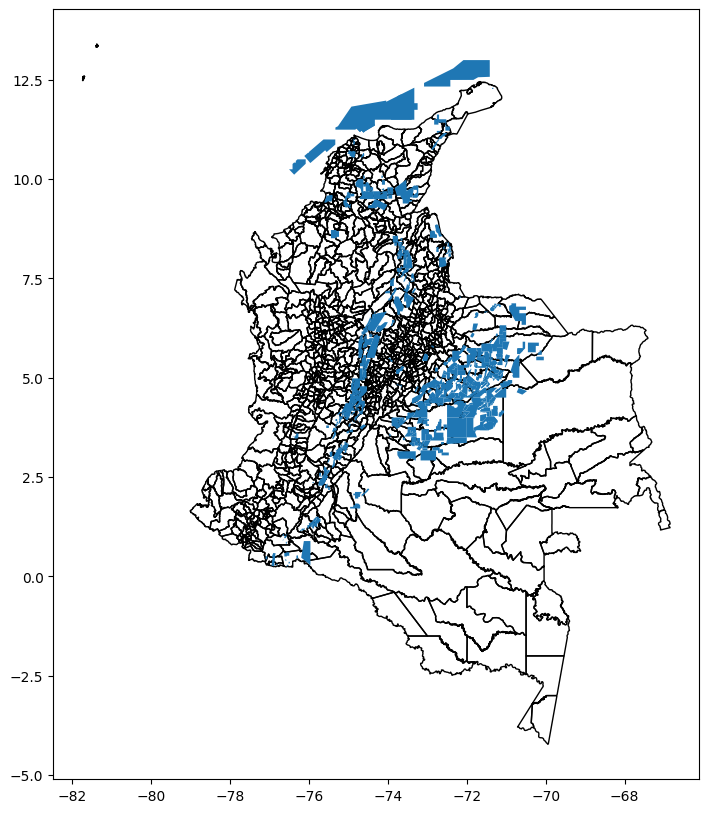

In [82]:
fig, ax = plt.subplots(figsize=(12,10))
colombia_gdf.plot(ax=ax, color='None')
gas_2014_gdf.plot(ax=ax)

## **Focusing on one Department (Cauca)**


*   Select Department
*   Clip roads, rivers, airports to Cauca
*   Plot all layers on common axis




In [8]:
# Select Cauca
cauca = dept_gdf[dept_gdf["NAME_1"].isin(["Cauca"])]
cauca

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
406,53,COL,Colombia,11,Cauca,407,Almaguer,CO.CA.AL,0,None,Municipio,Municipality,None,None,"POLYGON ((-76.91900 1.79490, -76.92480 1.80130..."
407,53,COL,Colombia,11,Cauca,408,Argelia,CO.CA.AG,0,None,Municipio,Municipality,None,None,"POLYGON ((-77.40909 2.21342, -77.40870 2.21860..."
408,53,COL,Colombia,11,Cauca,409,Balboa,CO.CA.BA,0,None,Municipio,Municipality,None,None,"POLYGON ((-77.24387 1.96429, -77.24660 1.96730..."
409,53,COL,Colombia,11,Cauca,410,Bolívar,CO.CA.BO,0,None,Municipio,Municipality,None,None,"POLYGON ((-76.91090 1.63080, -76.91490 1.63320..."
410,53,COL,Colombia,11,Cauca,411,Buenos Aires,CO.CA.BA,0,None,Municipio,Municipality,None,None,"POLYGON ((-76.63720 2.87270, -76.64530 2.87740..."
411,53,COL,Colombia,11,Cauca,412,Cajibío,CO.CA.CJ,0,None,Municipio,Municipality,None,None,"POLYGON ((-76.92880 2.75840, -76.92130 2.75490..."
412,53,COL,Colombia,11,Cauca,413,Caldonó,CO.CA.CD,0,None,Municipio,Municipality,None,None,"POLYGON ((-76.39680 2.77990, -76.40940 2.78050..."
413,53,COL,Colombia,11,Cauca,414,Caloto,CO.CA.CT,0,None,Municipio,Municipality,None,None,"POLYGON ((-76.29110 3.08990, -76.29370 3.08730..."
414,53,COL,Colombia,11,Cauca,415,Corinto,CO.CA.CO,0,None,Municipio,Municipality,None,None,"POLYGON ((-76.09200 3.05930, -76.09950 3.05710..."
415,53,COL,Colombia,11,Cauca,416,El Tambo,CO.CA.ET,0,None,Municipio,Municipality,None,None,"POLYGON ((-76.80070 2.45290, -76.80530 2.44200..."


In [85]:
# Select Florencia
florencia = cacua[cacua["NAME_2"].isin(["Florencia"])]
florencia

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
416,53,COL,Colombia,11,Cauca,417,Florencia,CO.CA.FL,0,None,Municipio,Municipality,None,None,"POLYGON ((-77.07230 1.73840, -77.06600 1.72450..."


In [88]:
print(cauca.crs)
print(rivers_gdf.crs)

EPSG:4326
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [97]:
# Reproject rivers_gdf to Cauca CRS
rivers_4326 = rivers_gdf.to_crs("EPSG:4326")
print(rivers_4326.crs)
rivers_4326

EPSG:4326


,gml_id,nombre_geo,symbol,geometry
0,Drenaje_DobleQ.1,RÍO BANADIA,3,"POLYGON ((-71.77688 6.98672, -71.77690 6.98673..."
1,Drenaje_DobleQ.2,RÍO SAN BARTOLO,3,"POLYGON ((-74.39558 6.68462, -74.39369 6.68327..."
2,Drenaje_DobleQ.3,BRAZUELO DE LA ROMPIDA,3,"POLYGON ((-73.98540 7.23822, -73.98589 7.23747..."
3,Drenaje_DobleQ.4,None,3,"POLYGON ((-71.58675 6.46682, -71.58673 6.46678..."
4,Drenaje_DobleQ.5,Estero,None,"POLYGON ((-70.76271 5.50627, -70.76281 5.50574..."
...,...,...,...,...
272,Drenaje_DobleQ.263,RÍO TOLA,3,"POLYGON ((-78.28576 2.60301, -78.28437 2.58979..."
273,Drenaje_DobleQ.264,ESTERO SECADERO,3,"POLYGON ((-78.28165 2.43932, -78.28157 2.44015..."
274,Drenaje_DobleQ.265,None,3,"POLYGON ((-77.64400 2.93037, -77.64378 2.92925..."
275,Drenaje_DobleQ.266,RÍO PATÍA,3,"POLYGON ((-78.41314 2.18721, -78.41418 2.18572..."


<Axes: >

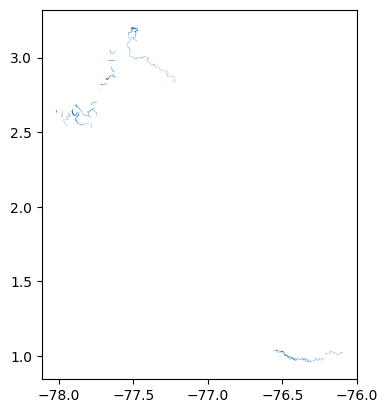

In [98]:
# Clip rivers to Cauca boundary
cauca_rivers = gpd.clip(rivers_4326, cauca)
cauca_rivers.plot()

EPSG:4326


<Axes: >

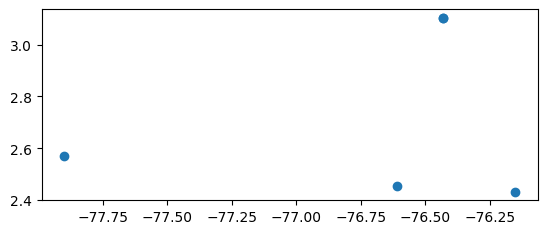

In [101]:
# Reproject col_airports_gdf to Cauca CRS
airports_4326 = col_airports_gdf.to_crs("EPSG:4326")
print(airports_4326.crs)
airports_4326

# Clip airports to Cauca boundary
cauca_aero = gpd.clip(airports_4326, cauca)
cauca_aero

# Plot Cauca airports
cauca_aero.plot()

In [102]:
# Reproject oil/gas to Cauca CRS
og_4326 = oil_gdf.to_crs("EPSG:4326")
print(og_4326.crs)


# Clip oil & gas to Cauca
cauca_oil_gas = gpd.clip(og_4326, cauca)
cauca_oil_gas

EPSG:4326


,CORPORACIO,DEPTO,ESTADO,EXP,FECHA,MUNIC,PROYECTO,REGION,RESOLUCION,SOLICITANT,geometry
866,CORPOAMAZONIA,PUTUMAYO,SEGUIMIENTO,LAM0042,18/05/1995,None,POZO DE DESARROLLO LINDA-5,AMAZONIA,472.0,GRAN TIERRA ENERGY COLOMBIA,POINT (-76.47776 0.99100)
864,CORPOAMAZONIA,PUTUMAYO,SEGUIMIENTO,LAM0042,18/05/1995,PUERTO GUZMAN,POZO DE DESARROLLO TOROYACO-5,AMAZONIA,472.0,GRAN TIERRA ENERGY COLOMBIA,POINT (-76.47122 0.99240)
865,CORPOAMAZONIA,CAUCA,SEGUIMIENTO,LAM0042,18/05/1995,PIAMONTE,POZO DE DESARROLLO TOROYACO-4,AMAZONIA,472.0,GRAN TIERRA ENERGY COLOMBIA,POINT (-76.30377 0.99311)
867,CORPOAMAZONIA,PUTUMAYO,SEGUIMIENTO,LAM0042,18/05/1995,MOCOA,POZO DE DESARROLLO LINDA-4,AMAZONIA,472.0,GRAN TIERRA ENERGY COLOMBIA,POINT (-76.51284 1.00903)
1,CORPOAMAZONIA,CAQUETA,SEGUIMIENTO,LAM4353,04/06/2009,SAN JOSE DEL FRAGUA,AREA DE PERFORACION EXPLORATORIA TOPOYACO-TOPO...,AMAZONIA,1035.0,TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA,POINT (-76.23612 1.13818)
2,CORPOAMAZONIA,CAQUETA,SEGUIMIENTO,LAM4353,04/06/2009,SAN JOSE DEL FRAGUA,AREA DE PERFORACION EXPLORATORIA TOPOYACO-TOPO...,AMAZONIA,1035.0,TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA,POINT (-76.22893 1.14162)
0,CORPOAMAZONIA,CAQUETA,SEGUIMIENTO,LAM4353,04/06/2009,SAN JOSE DEL FRAGUA,AREA DE PERFORACION EXPLORATORIA TOPOYACO-TOPO...,AMAZONIA,1035.0,TRAYECTORIA OIL AND GAS SUCURSAL COLOMBIA,POINT (-76.22626 1.14385)


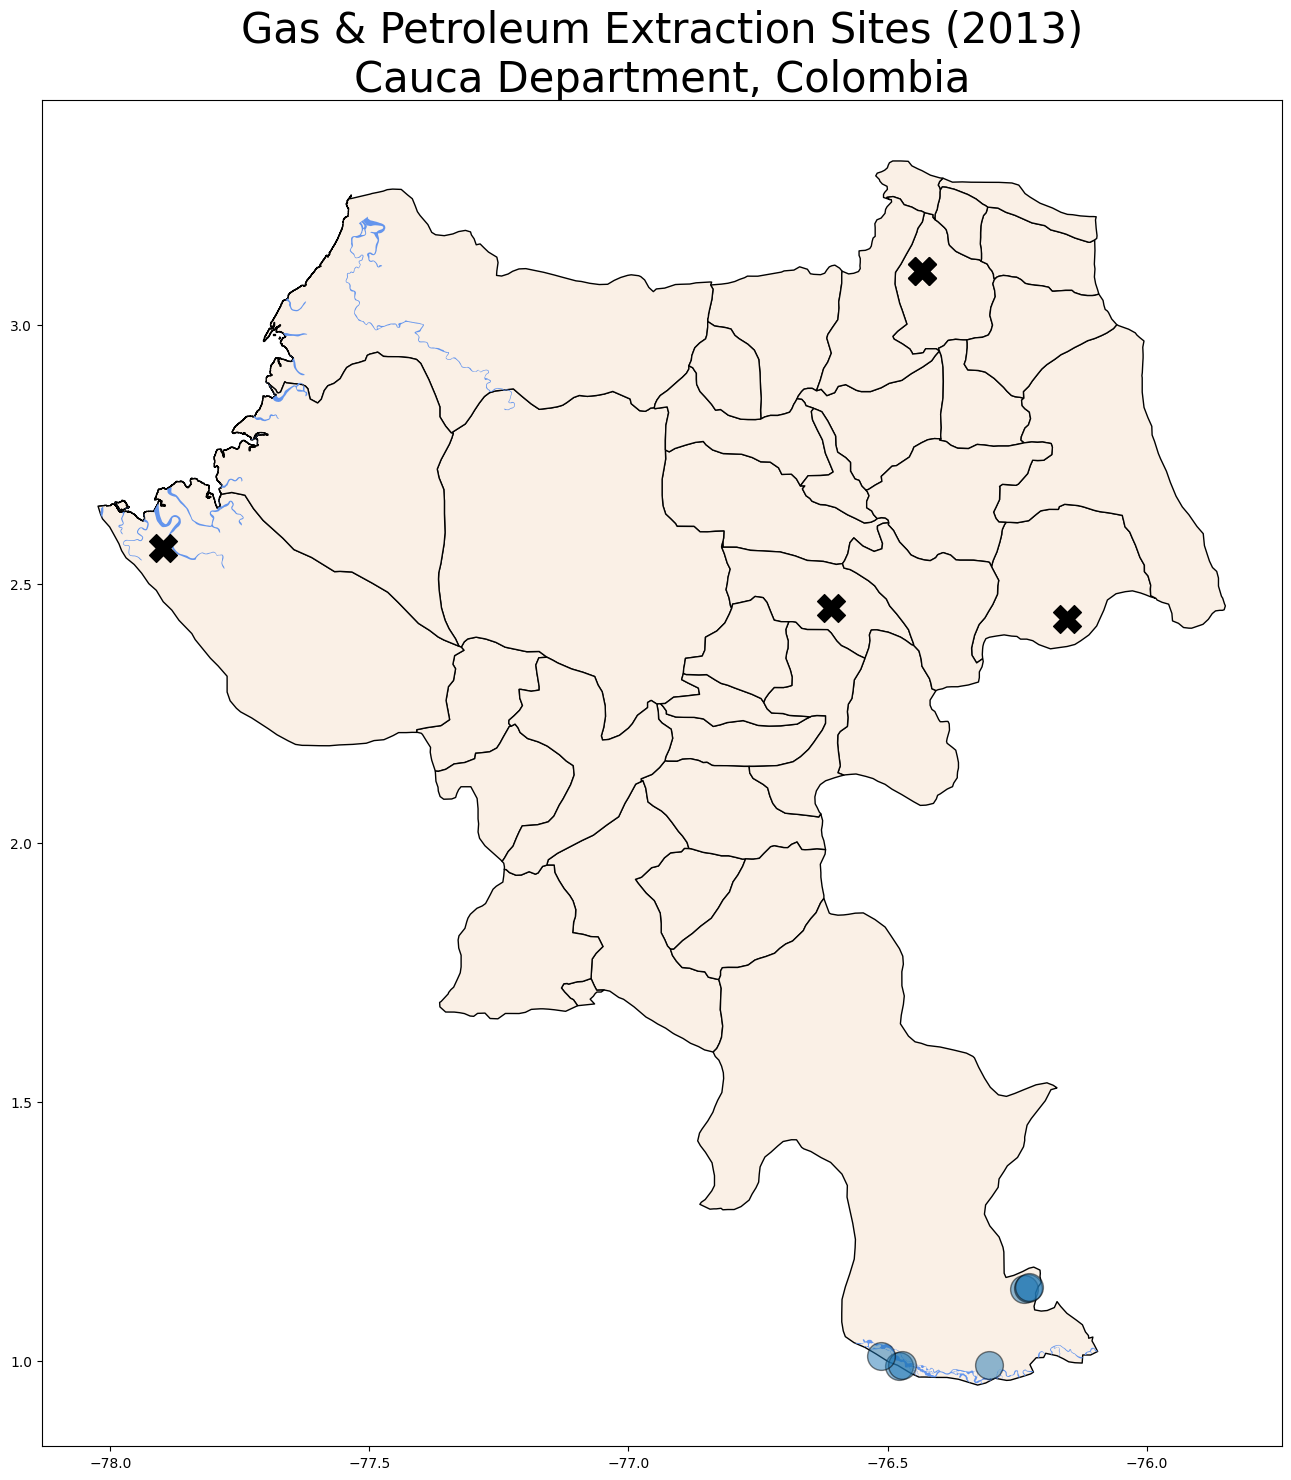

In [106]:
# Plot roads, rivers, oil & gas within Cauca
fig, ax = plt.subplots(figsize=(16, 40))
cauca.plot(ax=ax,
           edgecolor='black',
           color='linen')
cauca_rivers.plot(ax=ax,
                color='cornflowerblue',
                linewidth=0.8)
cauca_aero.plot(ax=ax,
                color='black',
                marker="X",
                markersize=400,
                zorder=4)

cauca_oil_gas.plot(ax=ax,
                   edgecolor='black',
                   marker="o",
                   markersize=400,
                   alpha=0.5,
                   zorder=4)

#plt.legend(loc="upper left")
plt.title("Gas & Petroleum Extraction Sites (2013)\nCauca Department, Colombia", fontsize=30)
plt.show()

## **Focus on one municipality (Puetro Asis)**


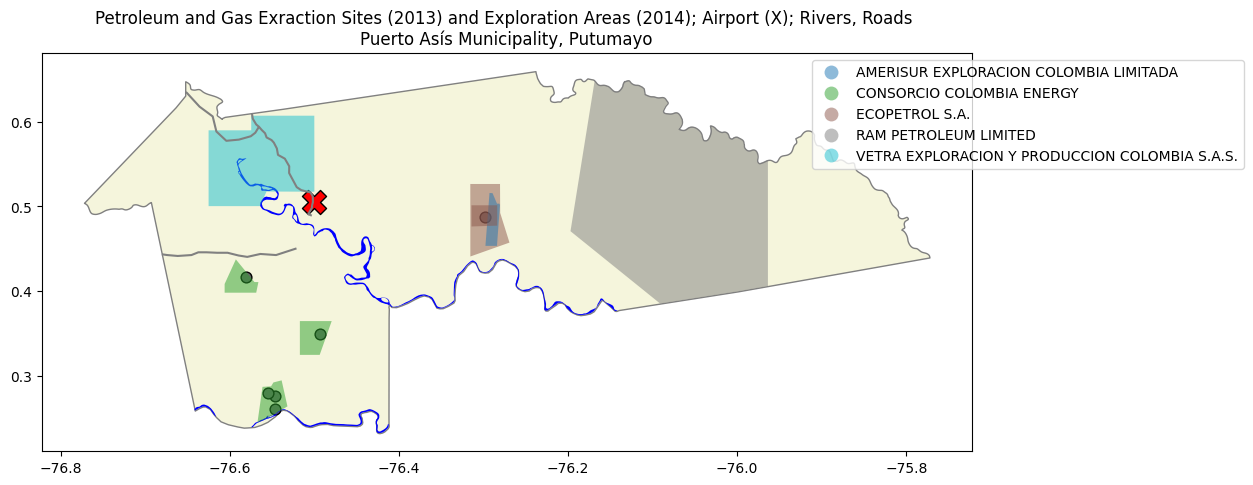

In [107]:
# Zoom in on PUERTO ASÍS

# Extract PUERTO ASÍS from Putumayo boundary
puerto_asis = colombia_gdf[colombia_gdf["NOM_MUNICI"].isin(["PUERTO ASÍS"])]
puerto_asis

# Clip oil gas points 2013 to PUERTO ASÍS boundary
puerto_asis_oil_gas = gpd.clip(oil_gdf, puerto_asis)
puerto_asis_oil_gas

# Clip rivers to PUERTO ASÍS boundary
puerto_asis_rivers = gpd.clip(rivers_gdf, puerto_asis)
puerto_asis_rivers

# Clip roads to PUERTO ASÍS boundary
puerto_asis_roads = gpd.clip(roads_gdf, puerto_asis)
puerto_asis_roads

# Clip airports to PUERTO ASÍS boundary
puerto_asis_airports = gpd.clip(col_airports_gdf, puerto_asis)
puerto_asis_airports

# Clip gas/oil polygon 2014 to PUERTO ASÍS boundary
puerto_asis_gas_2014 = gpd.clip(gas_2014_gdf, puerto_asis)
puerto_asis_gas_2014

# Plot Puerto Asis boundary and clipped oil and gas
fig, ax = plt.subplots(figsize=(12,6))
puerto_asis.plot(ax=ax, color='beige', edgecolor='grey')
puerto_asis_oil_gas.plot(ax=ax, color='dimgrey', edgecolor='black', markersize=60)
puerto_asis_rivers.plot(ax=ax, color='blue')
puerto_asis_roads.plot(ax=ax, color='grey')
puerto_asis_airports.plot(ax=ax, marker="X", markersize=300, color='red', edgecolor='black')
puerto_asis_gas_2014.plot(ax=ax, column="SOLICITANT", legend=True, alpha=0.5)

# Define and place legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3, 1.0, 0., 0.))

ax.set(title="Petroleum and Gas Exraction Sites (2013) and Exploration Areas (2014); Airport (X); Rivers, Roads \nPuerto Asís Municipality, Putumayo")

plt.show()

In [108]:
puerto_asis_forest

NameError: name 'puerto_asis_forest' is not defined

## **Interactive Maps with Folium**

In [111]:
# Create an interactive map of airports using folium

import folium

#Define coordinates of where we want to center our map
map_center_coords = [5.0, -72.0]

#Create the map
my_map = folium.Map(location = map_center_coords, zoom_start = 6)

# for lat,long in zip(bigger_air_and_heli.geometry.y, bigger_air_and_heli.geometry.x):
#     folium.Marker(
#         location=[lat, long],
#         #popup=['name']
#     ).add_to(my_map)

for _, airport_info in inter_mil_nat.iterrows():
    folium.Marker(
        location=[airport_info.geometry.y, airport_info.geometry.x],
        popup=airport_info['nombre']
    ).add_to(my_map)

my_map

## **Raster Data**
Let's try working with some raster data, specifically Landsat-derived landcover data from the Colombian Amazon 2001-2016

**Source:** [https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1783](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1783)

**NOTE:** These data are too big as they are and need to be clipped down to the sub-department level to be worked with easily. BUT the clipping is so compute intensive that it's breaking Colab :(

In [112]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [113]:
# Define *path to* working directory
working_dir = os.path.join("/content/drive/MyDrive/Colab Notebooks/"
                           "2023-geopark-notebooks")

# Create path to working directory
if not os.path.exists(working_dir):
    os.makedirs(working_dir)

# Define working directory
os.chdir(working_dir)
print("The current working directory is:\n", os.getcwd())

# Define path to data
raster_path = os.path.join(working_dir,
                           "landcover_colombian_amazon_2001.tif")


The current working directory is:
 /content/drive/MyDrive/Colab Notebooks/2023-geopark-notebooks


In [114]:
# Define url to 2002 raster data
raster_2002_url = ("https://data.cyverse.org/dav-anon/iplant/home/shared/"
                   "earthlab/geopark/landcover_colombian_amazon_2002.tif")

In [115]:
# Open data using rioxarray
landcover_2002_arr = rxr.open_rasterio(raster_2002_url, masked=True).squeeze()
landcover_2002_arr

<xarray.DataArray (y: 34165, x: 44745)>
[1528712925 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 1.641e+05 1.641e+05 ... 1.506e+06 1.506e+06
  * y            (y) float64 5.952e+05 5.951e+05 ... -4.297e+05 -4.298e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        7
    STATISTICS_MEAN:           1.3176634733616
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         0.99581730881901
    STATISTICS_VALID_PERCENT:  34.03
    scale_factor:              1.0
    add_offset:                0.0

In [116]:
# Display shape of raster
landcover_2002_arr.shape

(34165, 44745)

In [117]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", landcover_2002_arr.rio.crs)
print("The spatial extent is:", landcover_2002_arr.rio.bounds())

The CRS for this data is: EPSG:32618
The spatial extent is: (164085.0, -429765.0, 1506435.0, 595185.0)


<Axes: >

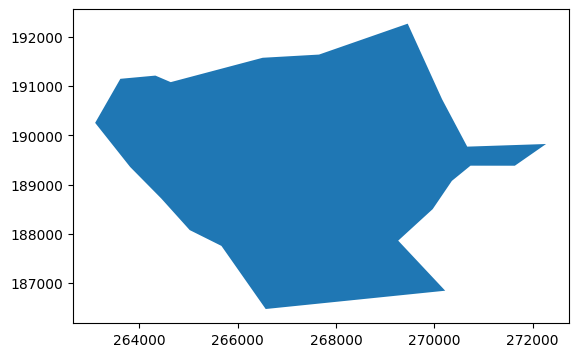

In [118]:
# Reproject Puerto Asis shp to same CRS as raster (EPSG: 32618)
florencia_32618 = florencia.to_crs(landcover_2002_arr.rio.crs)
florencia_32618.plot()

In [ ]:
# Clip raster to Florencia boundary
landcover_2002_clipped = landcover_2002_arr.rio.clip(florencia_32618.geometry)
landcover_2002_clipped

In [ ]:
# Plot the raster
fig, ax = plt.subplots()
landcover_2001_arr.plot(ax=ax)

plt.show()

In [ ]:
fig, (ax1) = plt.subplots(4,4, figsize=(3,2))


In [4]:
# Open Geology of S America gdf

geology_url = (
    "https://data.cyverse.org/dav-anon/iplant/home/shared/"
    "earthlab/geopark/geo6ag.zip")

geology_gdf = gpd.read_file(geology_url)
geology_gdf

,AREA,PERIMETER,GEO6AG_,GEO6AG_ID,GLG,geometry
0,0.040,0.855,2,1,Q,"POLYGON ((-59.66749 13.29528, -59.66698 13.312..."
1,0.056,1.279,3,2,T,"POLYGON ((-71.50227 12.30068, -71.50932 12.307..."
2,0.131,2.377,4,3,T,"POLYGON ((-71.50227 12.30068, -71.52989 12.273..."
3,0.036,1.236,5,4,Q,"POLYGON ((-71.44106 12.28247, -71.44624 12.277..."
4,0.026,0.919,6,4988,T,"POLYGON ((-71.19487 12.24533, -71.18432 12.235..."
...,...,...,...,...,...,...
4955,0.011,0.772,4957,0,MCi,"POLYGON ((-67.56933 -55.71361, -67.55640 -55.7..."
4956,0.016,0.970,4958,0,MCi,"POLYGON ((-67.61195 -55.90223, -67.62279 -55.9..."
4957,0.007,0.403,4959,5036,MCi,"POLYGON ((-67.28674 -55.87095, -67.28998 -55.8..."
4958,0.003,0.259,4960,5037,MCi,"POLYGON ((-67.20068 -55.85864, -67.19444 -55.8..."


In [10]:
# Clip S America geology to Colombia boundary

geog_clipped = geology_gdf.clip(cauca.geometry)
geog_clipped

,AREA,PERIMETER,GEO6AG_,GEO6AG_ID,GLG,geometry
676,0.862,6.922,678,0,pC,"POLYGON ((-76.29891 0.97355, -76.30227 0.97686..."
729,2.972,25.179,731,746,Cv,"MULTIPOLYGON (((-76.76378 1.60376, -76.76045 1..."
750,0.425,6.649,752,770,K,"POLYGON ((-76.49622 1.08569, -76.49953 1.08234..."
754,0.056,1.005,756,774,K,"POLYGON ((-76.30231 0.98354, -76.30227 0.97686..."
734,0.103,2.566,736,752,PMi,"POLYGON ((-76.25273 1.51120, -76.24942 1.51457..."
513,2.224,35.425,515,559,Mv,"MULTIPOLYGON (((-76.40917 3.28274, -76.40908 3..."
706,0.285,4.525,708,0,pC,"MULTIPOLYGON (((-76.25941 1.51115, -76.26603 1..."
698,0.561,4.894,700,715,T,"MULTIPOLYGON (((-76.15635 1.09449, -76.16629 1..."
678,0.364,5.189,680,693,T,"POLYGON ((-77.19329 2.88039, -77.19658 2.87700..."
696,0.306,3.226,698,713,Cv,"MULTIPOLYGON (((-76.40032 1.60356, -76.40029 1..."


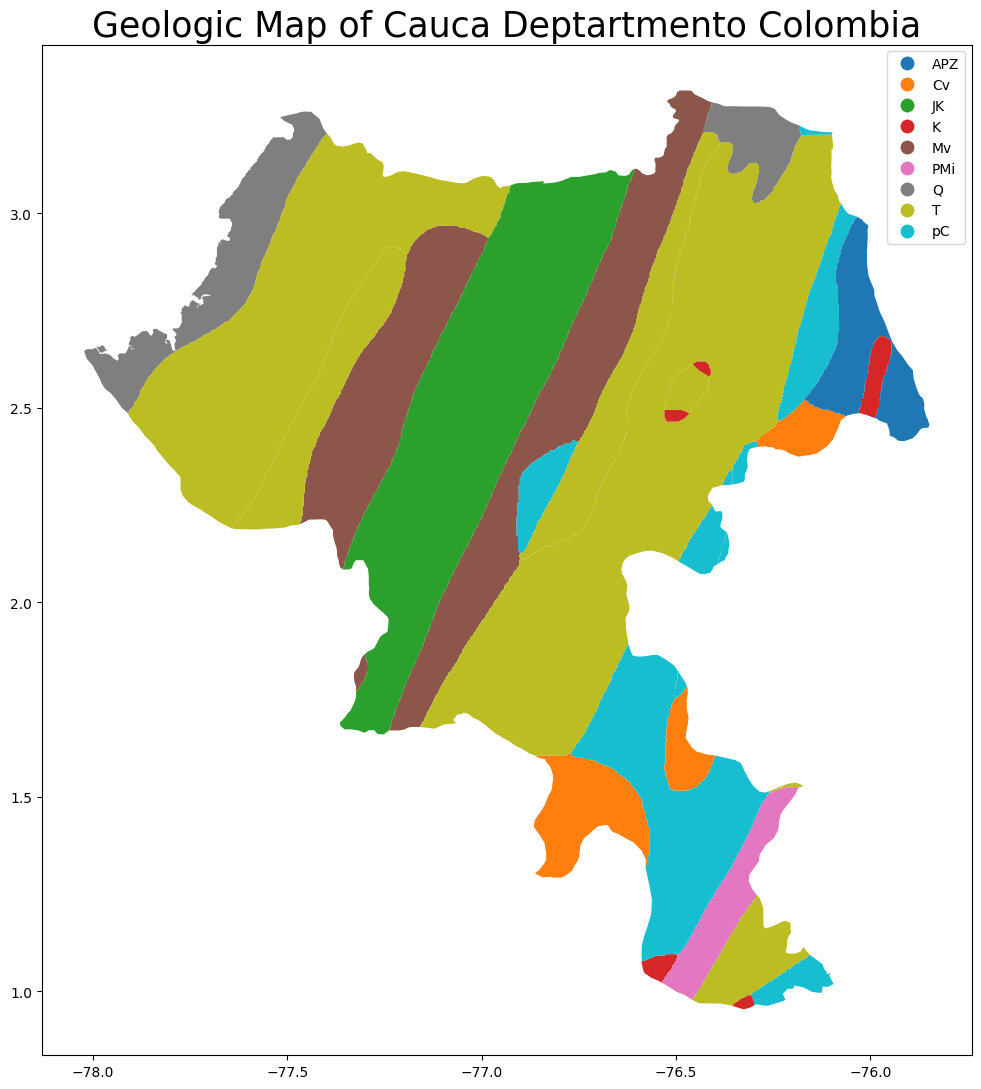

In [12]:
# Plot clipped geology
fig, ax = plt.subplots(figsize=(12,20))
geog_clipped.plot(ax=ax,
                  column='GLG',
                  legend=True)
plt.title("Geologic Map of Cauca Deptartmento Colombia", fontsize=25)
plt.show()